In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_squared_error, log_loss, r2_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import GradientBoostingClassifier
from GBDT.GradientBoostDecisionTree import GBDTClassifier

In [2]:
data = datasets.load_iris()
x = data.data
y = data.target
x.shape

(150, 4)

## My GBDT

In [3]:
Gbdt = GBDTClassifier(1000, 0.1, 'deviance', tree_params={'criterion': 'mse', 'max_depth': 3}, subsample=0.7, tol=0.002)
Gbdt.fit(x, y)

early stopping in round 450, best round is 430, M = 450


GBDTClassifier(learning_rate=0.1, loss='deviance', n_estimators=450,
               n_iter_no_change=2, random_state=None, subsample=0.7, tol=0.0005,
               tree_params={'criterion': 'mse', 'max_depth': 3})

In [4]:
r2_score(y, Gbdt.predict(x))

1.0

In [5]:
Gbdt.predict_log_proba(x)

array([[ 3.71976084, -3.75904359, -3.78904809],
       [ 3.71976084, -3.69651098, -3.78717362],
       [ 3.71976084, -3.75507945, -3.78904896],
       [ 3.71976084, -3.72926626, -3.78904896],
       [ 3.71976084, -3.75904359, -3.78904809],
       [ 3.71976084, -3.72035613, -3.78904809],
       [ 3.71976084, -3.76300238, -3.78904896],
       [ 3.71976084, -3.75881749, -3.78904809],
       [ 3.71976084, -3.59277148, -3.78717362],
       [ 3.71976084, -3.72926626, -3.78904896],
       [ 3.71976084, -3.71827728, -3.78904809],
       [ 3.71976084, -3.76277628, -3.78904896],
       [ 3.71976084, -3.69651098, -3.78717362],
       [ 3.71976084, -3.70460754, -3.78717362],
       [ 3.71976084, -3.53017271, -3.81969668],
       [ 3.71976084, -3.54287329, -3.78904809],
       [ 3.71976084, -3.72058223, -3.78904809],
       [ 3.71976084, -3.75904359, -3.78904809],
       [ 3.71976084, -3.53578   , -3.78904809],
       [ 3.71976084, -3.76026987, -3.78904809],
       [ 3.71976084, -3.71827728, -3.789

In [6]:
Gbdt.predict_proba(x)

array([[0.9763339 , 0.02277522, 0.0221169 ],
       [0.9763339 , 0.02420931, 0.02215748],
       [0.9763339 , 0.02286362, 0.02211688],
       [0.9763339 , 0.02344746, 0.02211688],
       [0.9763339 , 0.02277522, 0.0221169 ],
       [0.9763339 , 0.02365235, 0.0221169 ],
       [0.9763339 , 0.02268728, 0.02211688],
       [0.9763339 , 0.02278025, 0.0221169 ],
       [0.9763339 , 0.02678478, 0.02215748],
       [0.9763339 , 0.02344746, 0.02211688],
       [0.9763339 , 0.02370041, 0.0221169 ],
       [0.9763339 , 0.02269229, 0.02211688],
       [0.9763339 , 0.02420931, 0.02215748],
       [0.9763339 , 0.02401877, 0.02215748],
       [0.9763339 , 0.02846581, 0.02146366],
       [0.9763339 , 0.02811667, 0.0221169 ],
       [0.9763339 , 0.02364713, 0.0221169 ],
       [0.9763339 , 0.02277522, 0.0221169 ],
       [0.9763339 , 0.02831115, 0.0221169 ],
       [0.9763339 , 0.02274794, 0.0221169 ],
       [0.9763339 , 0.02370041, 0.0221169 ],
       [0.9763339 , 0.02278025, 0.0221169 ],
       [0.

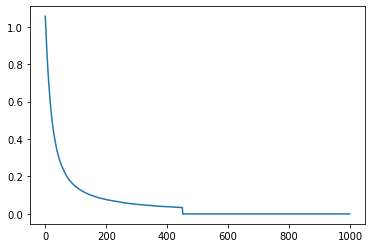

In [7]:
plt.plot(range(len(Gbdt.train_score_)), Gbdt.train_score_)

In [8]:
Gbdt.feature_importances_

array([0.0410268 , 0.05899077, 0.44537926, 0.45682539])

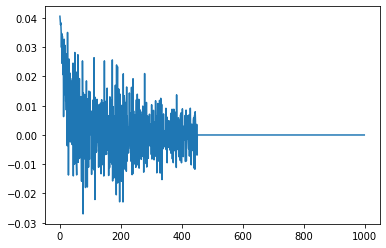

In [9]:
plt.plot(range(len(Gbdt.oob_improvement_)), Gbdt.oob_improvement_)

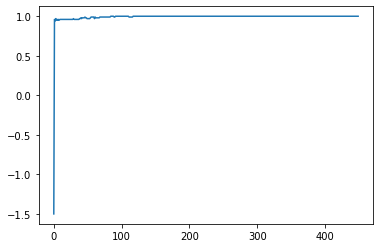

In [10]:
scores = [r2_score(y, pred) for pred in Gbdt.staged_predict(x)]
plt.plot(np.arange(len(scores)), scores)

In [11]:
log_proba = [p for p in Gbdt.staged_predict_log_proba(x)]
log_proba[0].shape

(150, 3)

In [12]:
Gbdt.get_params()

{'learning_rate': 0.1,
 'loss': 'deviance',
 'n_estimators': 450,
 'n_iter_no_change': 2,
 'random_state': None,
 'subsample': 0.7,
 'tol': 0.0005,
 'tree_params': {'criterion': 'mse', 'max_depth': 3}}

In [13]:
from sklearn.utils.estimator_checks import check_estimator
#check_estimator(GBDTClassifier)

 ## Sklearn GBDT

In [15]:
gbr = GradientBoostingClassifier(criterion='mse', loss='deviance', n_estimators=1000, learning_rate=0.1, max_depth=3, subsample=0.7)
gbr.fit(x, y)

GradientBoostingClassifier(criterion='mse', init=None, learning_rate=0.1,
                           loss='deviance', max_depth=3, max_features=None,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=1000, n_iter_no_change=None,
                           presort='auto', random_state=None, subsample=0.7,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [16]:
r2_score(y, gbr.predict(x))

1.0

In [17]:
gbr.predict_log_proba(x)

array([[-4.07806170e-05, -1.01927713e+01, -1.26095996e+01],
       [-4.85345822e-05, -1.00568540e+01, -1.20851589e+01],
       [-3.64577029e-05, -1.02770107e+01, -1.31016855e+01],
       [-3.93595401e-05, -1.02773127e+01, -1.22153347e+01],
       [-4.07806170e-05, -1.01927713e+01, -1.26095996e+01],
       [-5.26409016e-05, -9.91759143e+00, -1.26096115e+01],
       [-2.87258862e-05, -1.05642895e+01, -1.27495513e+01],
       [-4.07806170e-05, -1.01927713e+01, -1.26095996e+01],
       [-4.85345822e-05, -1.00568540e+01, -1.20851589e+01],
       [-3.93595401e-05, -1.02773127e+01, -1.22153347e+01],
       [-5.26409016e-05, -9.91759143e+00, -1.26096115e+01],
       [-2.87258862e-05, -1.05642895e+01, -1.27495513e+01],
       [-4.85345822e-05, -1.00568540e+01, -1.20851589e+01],
       [-4.85345822e-05, -1.00568540e+01, -1.20851589e+01],
       [-1.36776372e-04, -8.92189334e+00, -1.26120423e+01],
       [-1.36776372e-04, -8.92189334e+00, -1.26120423e+01],
       [-5.26409016e-05, -9.91759143e+00

In [17]:
gbr.predict_proba(x)

array([[9.99855868e-01, 1.34279677e-04, 9.85279277e-06],
       [9.99819258e-01, 1.72889494e-04, 7.85215430e-06],
       [9.99837325e-01, 1.55009912e-04, 7.66489551e-06],
       [9.99840131e-01, 1.51765231e-04, 8.10357329e-06],
       [9.99855868e-01, 1.34279677e-04, 9.85279277e-06],
       [9.99855868e-01, 1.34279677e-04, 9.85279277e-06],
       [9.99887040e-01, 1.03105652e-04, 9.85457412e-06],
       [9.99855868e-01, 1.34279677e-04, 9.85279277e-06],
       [9.99789215e-01, 2.01605930e-04, 9.17950265e-06],
       [9.99840131e-01, 1.51765231e-04, 8.10357329e-06],
       [9.99855868e-01, 1.34279677e-04, 9.85279277e-06],
       [9.99887040e-01, 1.03105652e-04, 9.85457412e-06],
       [9.99819258e-01, 1.72889494e-04, 7.85215430e-06],
       [9.99819343e-01, 1.72808267e-04, 7.84846518e-06],
       [9.99815946e-01, 1.74236408e-04, 9.81710402e-06],
       [9.99816012e-01, 1.74174417e-04, 9.81361124e-06],
       [9.99855868e-01, 1.34279677e-04, 9.85279277e-06],
       [9.99855868e-01, 1.34279

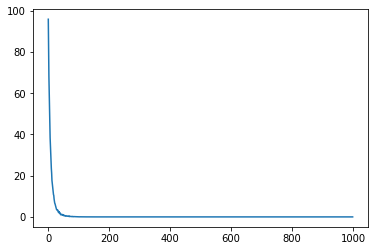

In [18]:
plt.plot(range(len(gbr.train_score_)), gbr.train_score_)

In [19]:
gbr.feature_importances_

array([0.01068774, 0.02141528, 0.29874353, 0.66915344])

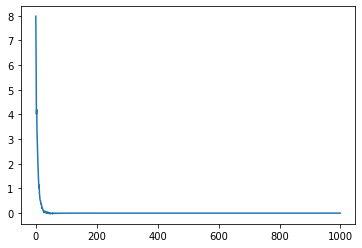

In [20]:
plt.plot(range(len(gbr.oob_improvement_)), gbr.oob_improvement_)

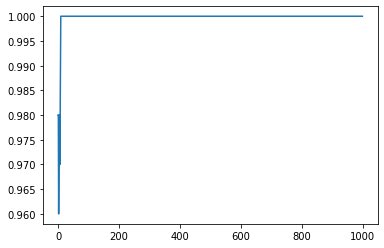

In [21]:
scores = [r2_score(y, pred) for pred in gbr.staged_predict(x)]
plt.plot(np.arange(len(scores)), scores)

In [22]:
proba = [p for p in gbr.staged_predict_proba(x)]
proba[0].shape

(150, 3)